# PCA - 차원축소

### 차원축소의 필요성
- 가까이 있는 변수가가지는 값을 예측 값으로 하는 모델이 있다고 할 때,
    > K-Nearest Neighborhood
- 쓸 데 없는 변수가 추가되는 것은 모델의 성능에 매우 악영향을 끼침.
    - 상관계수가 매우 큰 서로 다른 독립 변수
    - 예측하고자 하는 변수와 관련이 없는 변수

### 차원축소법
- 상관계수가 높은 변수 중 일부를 분석에서 제외한다면?
    - 정보의 손실 발생
    - 상관계수가 0.8이라고 하면, 0.2에 해당하는 정보는 버려지게 됨.
    
    <br>
    
- 차원을 줄이면서 정보의 손실을 최소화하는 방법 - PCA
    - Principal component을 활용
    
    <br>
    
- 이외의 방법
    - 변수 선택법
    - penalty 기반 regression
    - convolutional neural network
    - drop out & bagging

# PCA - 공분산행렬의 이해
### 공분산행렬

- X.1, X.2이 음의 상관관계를 가지므로, 둘의 공분산은 음수일 것.
- 대칭행렬이지만, 일반적인 공분산이 아닌 경우
    > Positive definite이 아님.

### 공분산의 형태 파악
- 점과 내적연산을 할 경우, 점의 위치를 이동시켜 해공분산 구조와 비슷한 형태를 갖게 된다.

# 그렇다면 PCA란?
### 차원을 줄이면서 정보의 손실을 최소화 하는 방법
- 더 적은 개수로 데이터를 충분히 잘 설명할 수 있는 새로운 축을 찾아냄.

### PC(Principal Components)를 얻어내는 과정
- 공분산이 데이터의 형태를 변형시키는 방향의 축과 그것에 직교하는 축을 찾아내는 과정.
- 2차원의 경우 공분산이 나타내는 타원의 장축과 단축.
- 찾아낸 새로운 축에서 좌표값을 의미.

### Kernel PCA
- 관측치 사이의 패턴이 존재하는 것으로 보이나, 변수 간의 선형관계가 아닐 때
    - 관측치 사이의 패턴을 수치화하고, 이것의 PC를 구해냄.
        > 기존에는 X 사이의 패턴. 즉, 공분산 구조를 봤음.
        <br>
        > 거리가 가까운 애들끼리 묶으면 무슨 패턴이 있지 않을까?
        - K(Kernel matrix)는 관측치 사이의 유사도 개념.
        <br>
        
            - 비슷한 관측치일 수록 큰 값.
            - 서로 이질적인 관측치일 수록 작은 값.
            - n X n matrix

# PCA 실습
### 1. 데이터 전처리 및 데이터 파악
- scikit-learn 패키지에서 Data와 PCA 로드.

In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# iris 데이터 불러오고 구조 살피기
iris = datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [45]:
# 독립변수 중 처음 2개만 사용해보기
X = iris.data[:, [0,2]]
y = iris.target

In [46]:
print(X.shape)
feature_names = [iris.feature_names[0], iris.feature_names[2]]
df_X = pd.DataFrame(X)
df_X.head()

(150, 2)


,0,1
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [47]:
print(y.shape)
df_Y = pd.DataFrame(y)
df_Y.head()

(150,)


,0
0,0
1,0
2,0
3,0
4,0


In [48]:
# 결측치 여부 파악
print(df_X.isnull().sum())
print(df_Y.isnull().sum())

0    0
1    0
dtype: int64
0    0
dtype: int64


In [49]:
# 어떠한 범주가 있는지 확인
set(y) # 0, 1, 2의 값이 나옴.
iris.target_names # 0, 1, 2가 어떠한 의미인지?

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

- 종속 변수(출력변수, 반응변수)의 분포를 살핌.

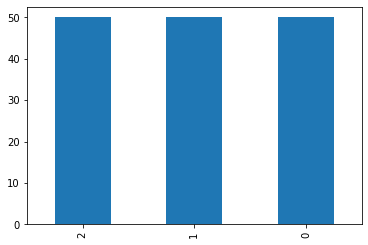

In [50]:
df_Y[0].value_counts().plot(kind='bar') # 범주형 변수가 각 몇 개씩 있는지?
plt.show()

- 독립 변수(속성 입력변수, 설명변수)의 분포를 살핌.

/Users/hyunsoolee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


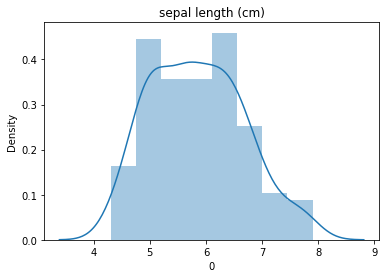

/Users/hyunsoolee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


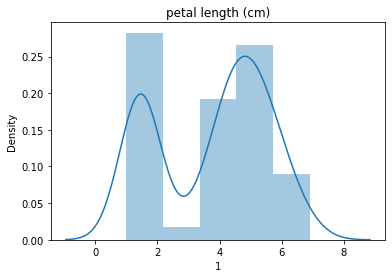

In [51]:
for i in range(df_X.shape[1]):
    sns.distplot(df_X[i])
    plt.title(feature_names[i])
    plt.show();

### PCA 함수 활용 및 아웃풋 의미 파악

- PCA 함수를 활용하여 PC를 얻어냄. 아래의 경우 PC를 2개 뽑아냄.

In [52]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

- PC score 얻어내어 이를 회귀분석에 활용.

In [53]:
eigen_v = pca.components_ # eigen vector
eigen_v

array([[ 0.39360585,  0.9192793 ],
       [-0.9192793 ,  0.39360585]])

In [54]:
eigen_v = pca.components_.transpose()

In [55]:
pca.explained_variance_ # eigen value

array([3.66189877, 0.1400726 ])

In [56]:
PC_score = pca.transform(X)
PC_score[0:5] # X라는 자료에 eigen vector들을 곱한 값.

array([[-2.46024094, -0.24479165],
       [-2.53896211, -0.06093579],
       [-2.70961121,  0.08355948],
       [-2.56511594,  0.25420858],
       [-2.49960153, -0.15286372]])

- 센터링 하기

In [57]:
mX = np.matrix(X)
for i in range(X.shape[1]):
    mX[:,i]=mX[:,i]-np.mean(X[:,i])
dfmX=pd.DataFrame(mX)

In [58]:
(mX * eigen_v)[0:5]

matrix([[-2.46024094, -0.24479165],
        [-2.53896211, -0.06093579],
        [-2.70961121,  0.08355948],
        [-2.56511594,  0.25420858],
        [-2.49960153, -0.15286372]])

- pc score와 같은 값이 나옴.

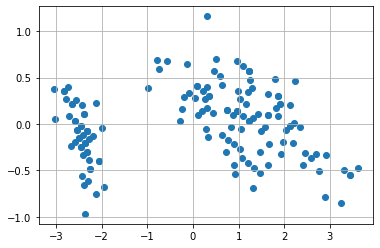

In [59]:
# 축이 바뀐 PC score
plt.scatter(PC_score[:,0],PC_score[:,1])
plt.grid()
plt.show()

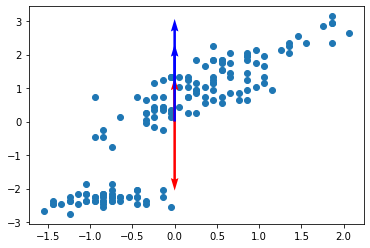

In [65]:
# 원래 데이터
plt.scatter(dfmX[0],dfmX[1])
origin = [0], [0] # origin point
plt.quiver(origin, eigen_v[0,:], color=['r'], scale=3)
plt.quiver(origin, eigen_v[1,:], color=['b'], scale=3)
plt.show()

### PC를 활용한 회귀분석

- 모든 독립변수를 활용하여 PC를 뽑아냄.

In [66]:
X2 = iris.data
pca2 = PCA(n_components=4)
pca2.fit(X2)

PCA(n_components=4)

In [67]:
pca2.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

- PC 2개만 뽑기

In [68]:
PCs=pca2.transform(X2)[:,0:2]

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

- 모델의 복잡성으로 인해 기존 자료를 이용한 분석은 수렴하지 않는 모습.

In [70]:
clf = LogisticRegression(solver='sag', multi_class='multinomial').fit(X2, y)

/Users/hyunsoolee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


- PC 2개 만을 뽑아내어 분석한 경우 모델이 수렴.

In [71]:
clf2 = LogisticRegression(solver='sag', multi_class='multinomial').fit(PCs, y)

In [72]:
clf2.predict(PCs)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [73]:
confusion_matrix(y, clf2.predict(PCs))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]])

- 임의로 변수 2개 만을 뽑아내어 분석한 경우 모델의 퍼포먼스가 하락함.

In [75]:
clf = LogisticRegression(solver='sag', max_iter=1000, random_state=0,
                        multi_class='multinomial').fit(X2[:,0:2], y)

In [76]:
confusion_matrix(y, clf.predict(X2[:,0:2]))

array([[49,  1,  0],
       [ 0, 37, 13],
       [ 0, 14, 36]])

- 위와 같이 차원축소를 통해 모델의 복잡성을 줄이는 동시에 최대한 많은 정보활용하여 분석 가능.